In [11]:
# install.packages("coefplot")
# library(coefplot)

In [12]:
sap_train <- read.csv('train.csv')

In [13]:
model <- glm(Customer_Churn ~ Satisfaction_with_AI_Services + AI_Personalization_Effectiveness + 
             Overall_Usage_Frequency + Customer_Service_Interactions, 
             data = sap_train, family = binomial)

summary(model)


Call:
glm(formula = Customer_Churn ~ Satisfaction_with_AI_Services + 
    AI_Personalization_Effectiveness + Overall_Usage_Frequency + 
    Customer_Service_Interactions, family = binomial, data = sap_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2092  -1.0461  -0.9321   1.2716   1.5103  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)                       0.121745   0.092157   1.321   0.1865  
Satisfaction_with_AI_Services    -0.087404   0.037626  -2.323   0.0202 *
AI_Personalization_Effectiveness  0.014204   0.037338   0.380   0.7036  
Overall_Usage_Frequency          -0.004516   0.003313  -1.363   0.1729  
Customer_Service_Interactions     0.003459   0.009069   0.381   0.7029  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6797.0  on 4999  degrees of freedom
Residual deviance: 6741.4  on 4995  degrees

In [ ]:
coefplot(model)

In [14]:
summary(sap_train)

       ID            Age        AI_Interaction_Level
 Min.   :   1   Min.   :21.00   Min.   :1.000       
 1st Qu.:1251   1st Qu.:32.00   1st Qu.:2.000       
 Median :2500   Median :43.00   Median :2.000       
 Mean   :2500   Mean   :42.58   Mean   :2.469       
 3rd Qu.:3750   3rd Qu.:53.00   3rd Qu.:3.000       
 Max.   :5000   Max.   :64.00   Max.   :4.000       
 Satisfaction_with_AI_Services AI_Personalization_Effectiveness
 Min.   : 1.000                Min.   : 1.000                  
 1st Qu.: 3.000                1st Qu.: 3.000                  
 Median : 5.000                Median : 5.000                  
 Mean   : 5.511                Mean   : 5.526                  
 3rd Qu.: 8.000                3rd Qu.: 8.000                  
 Max.   :10.000                Max.   :10.000                  
 AI_Response_Time Overall_Usage_Frequency Customer_Service_Interactions
 Min.   :1.000    Min.   : 1.00           Min.   : 0.000               
 1st Qu.:1.000    1st Qu.: 8.00      

In [22]:
# Load required library
library(readr)

# Explore the dataset structure
str(sap_train)

# Check for missing values
sum(is.na(sap_train))

# Fit logistic regression model
model <- glm(Customer_Churn ~ Age + AI_Interaction_Level + Satisfaction_with_AI_Services + 
                AI_Personalization_Effectiveness + AI_Response_Time + 
                Overall_Usage_Frequency + Customer_Service_Interactions + 
                Change_in_Usage_Patterns, 
              data = sap_train, family = binomial)

# Summarize the model
summary(model)


'data.frame':	5000 obs. of  10 variables:
 $ ID                              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age                             : int  59 49 35 63 28 41 59 39 43 31 ...
 $ AI_Interaction_Level            : int  2 2 2 2 4 3 2 3 3 4 ...
 $ Satisfaction_with_AI_Services   : int  7 6 3 3 6 1 8 8 8 6 ...
 $ AI_Personalization_Effectiveness: int  7 5 3 3 6 1 9 8 9 6 ...
 $ AI_Response_Time                : int  2 1 3 2 1 3 1 2 2 1 ...
 $ Overall_Usage_Frequency         : int  18 3 8 6 11 28 10 12 13 26 ...
 $ Customer_Service_Interactions   : int  5 2 2 6 3 2 1 10 8 3 ...
 $ Change_in_Usage_Patterns        : int  2 0 1 2 -1 -1 -2 -2 -1 -1 ...
 $ Customer_Churn                  : int  1 0 1 1 0 0 1 0 0 0 ...


[1] 0


Call:
glm(formula = Customer_Churn ~ Age + AI_Interaction_Level + Satisfaction_with_AI_Services + 
    AI_Personalization_Effectiveness + AI_Response_Time + Overall_Usage_Frequency + 
    Customer_Service_Interactions + Change_in_Usage_Patterns, 
    family = binomial, data = sap_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4791  -1.0386  -0.8417   1.2497   1.7669  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       1.490312   0.299814   4.971 6.67e-07 ***
Age                              -0.006199   0.003810  -1.627   0.1037    
AI_Interaction_Level             -0.411633   0.051462  -7.999 1.26e-15 ***
Satisfaction_with_AI_Services    -0.087719   0.038145  -2.300   0.0215 *  
AI_Personalization_Effectiveness  0.010874   0.037867   0.287   0.7740    
AI_Response_Time                 -0.040143   0.035838  -1.120   0.2627    
Overall_Usage_Frequency          -0.004403   0.003358  -1

`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


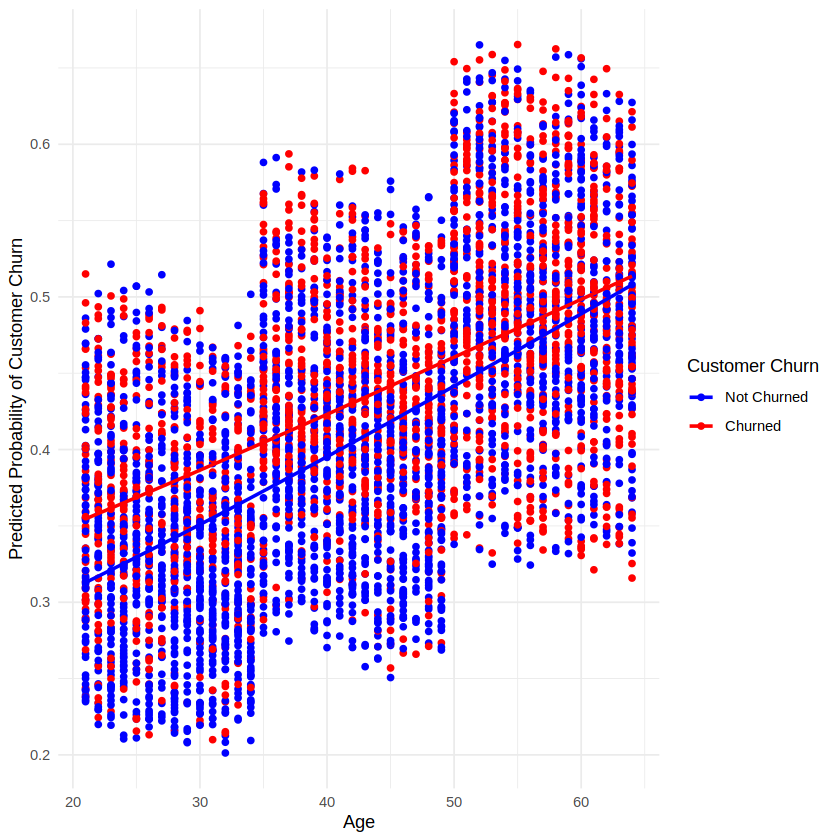

In [25]:
# Load required libraries
library(ggplot2)

# Predict probabilities using the model
sap_train$predicted_prob <- predict(model, type = "response")

# Create logistic regression graph
ggplot(sap_train, aes(x = Age, y = predicted_prob, color = factor(Customer_Churn))) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
  labs(x = "Age", y = "Predicted Probability of Customer Churn", color = "Customer Churn") +
  scale_color_manual(values = c("blue", "red"), labels = c("Not Churned", "Churned")) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


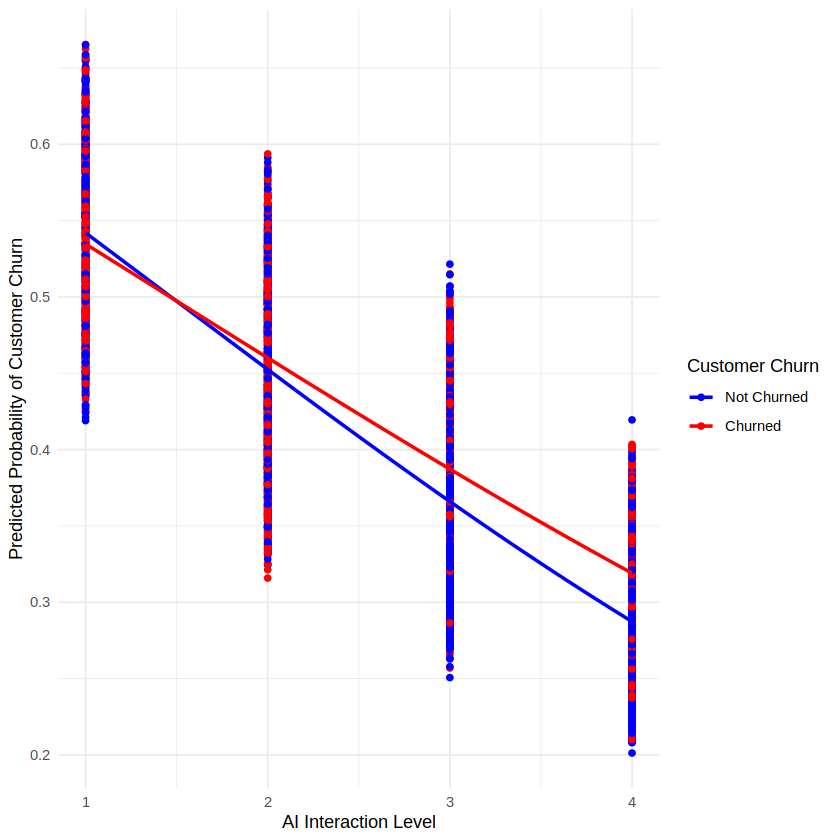

In [26]:
# Create logistic regression graph for AI_Interaction_Level
ggplot(sap_train, aes(x = AI_Interaction_Level, y = predicted_prob, color = factor(Customer_Churn))) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
  labs(x = "AI Interaction Level", y = "Predicted Probability of Customer Churn", color = "Customer Churn") +
  scale_color_manual(values = c("blue", "red"), labels = c("Not Churned", "Churned")) +
  theme_minimal()